# Statistical analysis to investigate trends and relationship of skin cancer

#The CSV file has details of which risk factor is directly coorelated to the cancer type

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import sklearn.datasets as dta
risk_factors_path = "aihw-can-144-data-tables-Ch-2-Risk-Factors.csv"

risk_factors_df = pd.read_csv(risk_factors_path)

risk_factors_df


,Cancer site/type,Tobacco use,Overweight and \nobesity,Alcohol use,Combined dietary \nrisks,High sun exposure,Diabetes,Occupational \nexposures and \nhazards,Physical inactivity,Illicit drug use,Unsafe sex,Air pollution
0,Lung cancer,"122,178",. .,. .,"5,927",. .,"10,463","11,668",. .,. .,. .,"5,430"
1,Oesophageal cancer,"12,323","8,204","5,162","5,584",. .,. .,. .,. .,. .,. .,. .
2,Pancreatic cancer,"11,154","4,953",. .,. .,. .,"3,419",. .,. .,. .,. .,. .
3,Liver cancer,"7,685","10,218","16,302",. .,. .,"2,658",. .,. .,"10,893",354,. .
4,Colorectal cancer,"6,619","13,169","5,697","25,635",. .,"5,999",. .,"11,497",. .,. .,. .
5,Lip and oral cavity cancers,"5,780",. .,"3,824",. .,. .,. .,. .,. .,. .,. .,. .
6,Bladder cancer,"4,397",. .,. .,. .,. .,"1,016",. .,. .,. .,. .,. .
7,Breast cancer,"3,967","5,399","7,988","2,338",. .,"3,087",. .,"2,308",. .,. .,. .
8,Leukaemia,"3,340","3,571",. .,. .,. .,. .,"1,047",. .,. .,. .,. .
9,Stomach cancer,"2,774",. .,. .,. .,. .,. .,. .,. .,. .,. .,. .


In [2]:
risk_factors1_df = risk_factors_df.dropna(how='any')
risk_factors1_df
#cleaning the file for null entries


,Cancer site/type,Tobacco use,Overweight and \nobesity,Alcohol use,Combined dietary \nrisks,High sun exposure,Diabetes,Occupational \nexposures and \nhazards,Physical inactivity,Illicit drug use,Unsafe sex,Air pollution
0,Lung cancer,"122,178",. .,. .,"5,927",. .,"10,463","11,668",. .,. .,. .,"5,430"
1,Oesophageal cancer,"12,323","8,204","5,162","5,584",. .,. .,. .,. .,. .,. .,. .
2,Pancreatic cancer,"11,154","4,953",. .,. .,. .,"3,419",. .,. .,. .,. .,. .
3,Liver cancer,"7,685","10,218","16,302",. .,. .,"2,658",. .,. .,"10,893",354,. .
4,Colorectal cancer,"6,619","13,169","5,697","25,635",. .,"5,999",. .,"11,497",. .,. .,. .
5,Lip and oral cavity cancers,"5,780",. .,"3,824",. .,. .,. .,. .,. .,. .,. .,. .
6,Bladder cancer,"4,397",. .,. .,. .,. .,"1,016",. .,. .,. .,. .,. .
7,Breast cancer,"3,967","5,399","7,988","2,338",. .,"3,087",. .,"2,308",. .,. .,. .
8,Leukaemia,"3,340","3,571",. .,. .,. .,. .,"1,047",. .,. .,. .,. .
9,Stomach cancer,"2,774",. .,. .,. .,. .,. .,. .,. .,. .,. .,. .


#Trying to explore the risk factors that is associated with both types of skin cancers.

In [3]:
cor_data = risk_factors1_df.loc[risk_factors1_df['Cancer site/type'] == 'Melanoma of the skin']

cor_data2= risk_factors1_df.loc[risk_factors1_df['Cancer site/type'] == 'Non-melanoma of the skin']
cor_data


,Cancer site/type,Tobacco use,Overweight and \nobesity,Alcohol use,Combined dietary \nrisks,High sun exposure,Diabetes,Occupational \nexposures and \nhazards,Physical inactivity,Illicit drug use,Unsafe sex,Air pollution
23,Melanoma of the skin,. .,. .,. .,. .,"25,910",. .,. .,. .,. .,. .,. .


In [4]:
cor_data2

,Cancer site/type,Tobacco use,Overweight and \nobesity,Alcohol use,Combined dietary \nrisks,High sun exposure,Diabetes,Occupational \nexposures and \nhazards,Physical inactivity,Illicit drug use,Unsafe sex,Air pollution
24,Non-melanoma of the skin,. .,. .,. .,. .,"9,421",. .,. .,. .,. .,. .,. .


In [5]:
Total = pd.Series([189178,61805,43260,39485,35330,27604,19787,15420,10893,7104,5430])

Total.describe()
# trying to establish the probability of the cancer type based on the weightage given to each risk factor-
# by plotting it in a bell curve 

count        11.000000
mean      41390.545455
std       51992.131521
min        5430.000000
25%       13156.500000
50%       27604.000000
75%       41372.500000
max      189178.000000
dtype: float64

<AxesSubplot:ylabel='Density'>

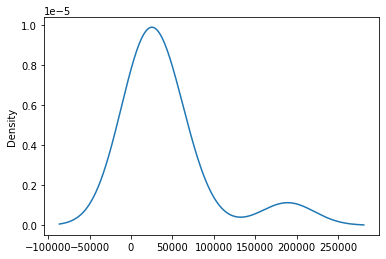

In [6]:
Total.plot.kde()

In [7]:
# This data establishes relationship of the general expenditure based on the diseases and risk factor associated to it.
spend_path = "table_1.csv"

spend_gov_df = pd.read_csv(spend_path, delimiter=',', encoding='cp1252', index_col=False)

spend_gov_df


,Burden of Disease group condition,Risk factor,Expenditure attributable to risk factor ($),Percentage of expenditure attributable to risk factor (%)
0,Acute lymphoblastic leukaemia (ALL),Occupational exposures & hazards,793177,1
1,Acute lymphoblastic leukaemia (ALL),Overweight (including obesity),2923162,3.8
2,Acute lymphoblastic leukaemia (ALL),Tobacco use,1344593,1.7
3,Acute lymphoblastic leukaemia (ALL),Risk factor undetermined or not relevant,72791152,93.5
4,Acute myeloid leukaemia (AML),Occupational exposures & hazards,3209842,3
...,...,...,...,...
293,Type 2 diabetes,Tobacco use,41053988,2.7
294,Type 2 diabetes,All risk factors combined,1541577945,100
295,Uterine cancer,Overweight (including obesity),36727247,43.5
296,Uterine cancer,Physical inactivity,11518912,13.6


In [8]:
spend_gov1_df = spend_gov_df.dropna(how='any')
spend_gov1_df
# cleaning the data for any null enteries

,Burden of Disease group condition,Risk factor,Expenditure attributable to risk factor ($),Percentage of expenditure attributable to risk factor (%)
0,Acute lymphoblastic leukaemia (ALL),Occupational exposures & hazards,793177,1
1,Acute lymphoblastic leukaemia (ALL),Overweight (including obesity),2923162,3.8
2,Acute lymphoblastic leukaemia (ALL),Tobacco use,1344593,1.7
3,Acute lymphoblastic leukaemia (ALL),Risk factor undetermined or not relevant,72791152,93.5
4,Acute myeloid leukaemia (AML),Occupational exposures & hazards,3209842,3
...,...,...,...,...
293,Type 2 diabetes,Tobacco use,41053988,2.7
294,Type 2 diabetes,All risk factors combined,1541577945,100
295,Uterine cancer,Overweight (including obesity),36727247,43.5
296,Uterine cancer,Physical inactivity,11518912,13.6


In [120]:

spend_gov1_df[' Expenditure attributable to risk factor ($) '] = pd.to_numeric(spend_gov1_df[' Expenditure attributable to risk factor ($) '], errors='coerce')
    
spend_gov1_df.head()
# converting the object to float for statistical calculations

,Burden of Disease group condition,Risk factor,Expenditure attributable to risk factor ($),Percentage of expenditure attributable to risk factor (%)
0,Acute lymphoblastic leukaemia (ALL),Occupational exposures & hazards,793177.0,1
1,Acute lymphoblastic leukaemia (ALL),Overweight (including obesity),2923162.0,3.8
2,Acute lymphoblastic leukaemia (ALL),Tobacco use,1344593.0,1.7
3,Acute lymphoblastic leukaemia (ALL),Risk factor undetermined or not relevant,72791152.0,93.5
4,Acute myeloid leukaemia (AML),Occupational exposures & hazards,3209842.0,3


In [121]:
spend_gov1_df.info()
# confirming the conversion of datatype

<class 'pandas.core.frame.DataFrame'>
Int64Index: 298 entries, 0 to 297
Data columns (total 4 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Burden of Disease group condition                          298 non-null    object 
 1   Risk factor                                                298 non-null    object 
 2    Expenditure attributable to risk factor ($)               297 non-null    float64
 3   Percentage of expenditure attributable to risk factor (%)  298 non-null    object 
dtypes: float64(1), object(3)
memory usage: 11.6+ KB


In [122]:
spend_gov1_df

,Burden of Disease group condition,Risk factor,Expenditure attributable to risk factor ($),Percentage of expenditure attributable to risk factor (%)
0,Acute lymphoblastic leukaemia (ALL),Occupational exposures & hazards,7.931770e+05,1
1,Acute lymphoblastic leukaemia (ALL),Overweight (including obesity),2.923162e+06,3.8
2,Acute lymphoblastic leukaemia (ALL),Tobacco use,1.344593e+06,1.7
3,Acute lymphoblastic leukaemia (ALL),Risk factor undetermined or not relevant,7.279115e+07,93.5
4,Acute myeloid leukaemia (AML),Occupational exposures & hazards,3.209842e+06,3
...,...,...,...,...
293,Type 2 diabetes,Tobacco use,4.105399e+07,2.7
294,Type 2 diabetes,All risk factors combined,1.541578e+09,100
295,Uterine cancer,Overweight (including obesity),3.672725e+07,43.5
296,Uterine cancer,Physical inactivity,1.151891e+07,13.6


In [123]:

sum1_df=spend_gov1_df.groupby(['Risk factor'],as_index=False)[' Expenditure attributable to risk factor ($) '].sum()
sum1_df
# sorting the data based on risk factor to expenditure

,Risk factor,Expenditure attributable to risk factor ($)
0,Air pollution,3.520182e+08
1,Alcohol use,2.107697e+09
2,All risk factors combined,3.294814e+09
3,Bullying victimisation,4.974388e+07
4,Child abuse & neglect,8.685968e+08
5,Dietary risks,1.180177e+09
6,High blood plasma glucose,3.186835e+09
7,High blood pressure,1.692718e+09
8,High cholesterol,4.129537e+08
9,High sun exposure,1.242119e+09


In [124]:
sum1_df = sum1_df[sum1_df['Risk factor'] != 'Risk factor undetermined or not relevant']
# cleaning the data for unattributed risk factors

In [125]:
list_of_single_column = list(sum1_df['Risk factor'])
list_of_single_column
# listing the risk factors to avoid errors in the name while grouping by

['Air pollution',
 'Alcohol use',
 'All risk factors combined',
 'Bullying victimisation',
 'Child abuse & neglect',
 'Dietary risks',
 'High blood plasma glucose',
 'High blood pressure',
 'High cholesterol',
 'High sun exposure',
 'Illicit drug use',
 'Impaired kidney function',
 'Intimate partner violence',
 'Iron deficiency',
 'Low birth weight & short gestation',
 'Low bone mineral density',
 'Occupational exposures & hazards',
 'Overweight (including obesity)',
 'Physical inactivity',
 'Tobacco use',
 'Unsafe sex']

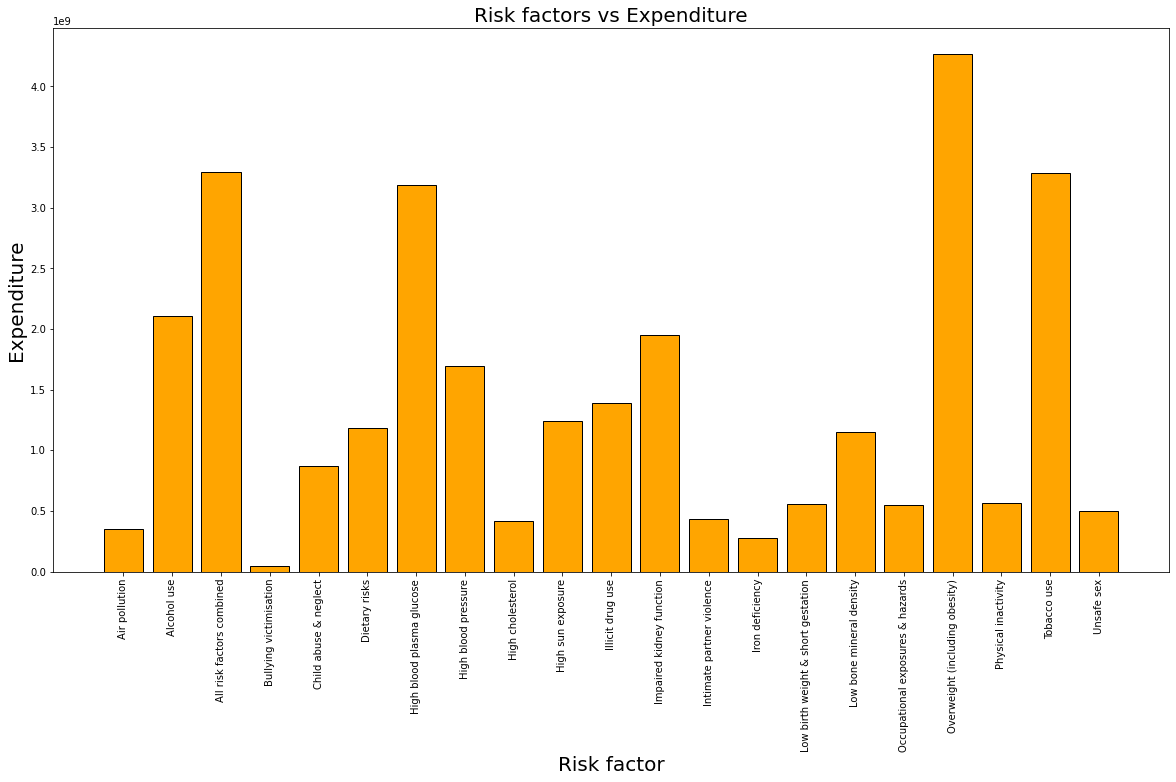

In [126]:
risks =sum1_df['Risk factor'].tolist()
values =sum1_df[' Expenditure attributable to risk factor ($) '].tolist()
  
fig = plt.figure(figsize = (20, 10))

# creating the bar plot
plt.bar(risks, values,color = "orange", width = .8,edgecolor= "black")
plt.xticks(rotation = 90) 
plt.xlabel("Risk factor",fontsize=20)
plt.ylabel("Expenditure",fontsize=20)
plt.title("Risk factors vs Expenditure",fontsize=20)
plt.show()
# to visually observe the expenditure due to different risk factors


In [127]:
spend1_path = "table_5.csv"


spend1_gov_df = pd.read_csv(spend1_path, delimiter=',',encoding='cp437', index_col=False)

spend1_gov_df
# The CSV details the government funding going into  to address the disease and risk factor associated to it

,Burden of disease group,Burden of disease condition,Health system spending attributable to risk factors ($),Total health system spending on burden of disease condition ($),Share of health system spending attributed to risk factors (%)
0,Infectious diseases,HIV/AIDS,3.420249e+08,3.718693e+08,92.0
1,Infectious diseases,Syphilis,8.733982e+06,8.733982e+06,100.0
2,Infectious diseases,Chlamydia,2.781124e+06,2.781124e+06,100.0
3,Infectious diseases,Gonorrhoea,6.943572e+06,6.943572e+06,100.0
4,Infectious diseases,Other sexually transmitted infections,6.022903e+07,6.022903e+07,100.0
...,...,...,...,...,...
91,Injury (external cause),Suicide and self-inflicted injuries,1.131192e+08,2.329196e+08,48.6
92,Injury (external cause),Homicide and violence,1.287715e+08,3.933969e+08,32.7
93,Injury (external cause),Road traffic injury - pedal cyclists,3.162794e+07,1.276917e+08,24.8
94,Injury (external cause),Road traffic injury - pedestrians,1.218896e+07,5.516501e+07,22.1


In [128]:
spend1_gov1_df = spend1_gov_df.dropna(how='any')
spend1_gov1_df
# cleaning the data for any null enteries

,Burden of disease group,Burden of disease condition,Health system spending attributable to risk factors ($),Total health system spending on burden of disease condition ($),Share of health system spending attributed to risk factors (%)
0,Infectious diseases,HIV/AIDS,342024940.0,3.718693e+08,92.0
1,Infectious diseases,Syphilis,8733982.0,8.733982e+06,100.0
2,Infectious diseases,Chlamydia,2781124.0,2.781124e+06,100.0
3,Infectious diseases,Gonorrhoea,6943572.0,6.943572e+06,100.0
4,Infectious diseases,Other sexually transmitted infections,60229029.0,6.022903e+07,100.0
...,...,...,...,...,...
90,Injury (external cause),Other unintentional injuries,343831588.0,2.627714e+09,13.1
91,Injury (external cause),Suicide and self-inflicted injuries,113119214.0,2.329196e+08,48.6
92,Injury (external cause),Homicide and violence,128771457.0,3.933969e+08,32.7
93,Injury (external cause),Road traffic injury - pedal cyclists,31627939.0,1.276917e+08,24.8


In [129]:
list(spend1_gov1_df)


['Burden of disease group',
 'Burden of disease condition',
 ' Health system spending attributable to risk factors ($) ',
 ' Total health system spending on burden of disease condition ($) ',
 'Share of health system spending attributed to risk factors  (%)']

In [130]:
spend1_gov1_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95 entries, 0 to 94
Data columns (total 5 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   Burden of disease group                                            95 non-null     object 
 1   Burden of disease condition                                        95 non-null     object 
 2    Health system spending attributable to risk factors ($)           95 non-null     float64
 3    Total health system spending on burden of disease condition ($)   95 non-null     float64
 4   Share of health system spending attributed to risk factors  (%)    95 non-null     float64
dtypes: float64(3), object(2)
memory usage: 4.5+ KB


Grouping the data - Disease group and Government spending

In [131]:
sort_df=spend1_gov1_df.groupby(['Burden of disease group'],as_index=False)[' Health system spending attributable to risk factors ($) '].sum()

sort_df.head()

,Burden of disease group,Health system spending attributable to risk factors ($)
0,Blood and metabolic disorders,2.773719e+08
1,Cancer and other neoplasms,3.497595e+09
2,Cardiovascular diseases,4.449386e+09
3,Endocrine disorders,2.473699e+09
4,Gastrointestinal disorders,4.925019e+08


THE ANALYSIS IS PLOTTED IN A BAR GRAPH FOR BETTER VISUALIZATION OF DATA

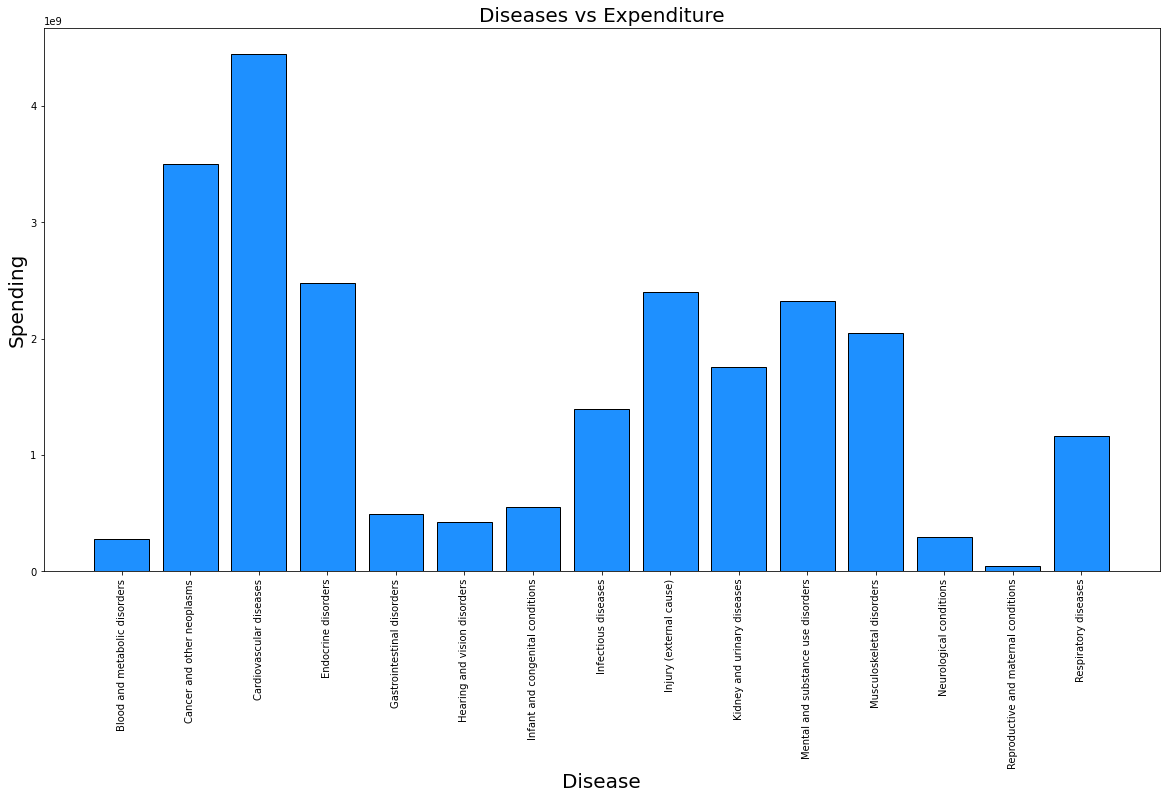

In [132]:
Diseases =sort_df['Burden of disease group'].tolist()
values =sort_df[' Health system spending attributable to risk factors ($) '].tolist()
  
fig = plt.figure(figsize = (20, 10))
 
# creating the bar plot
plt.bar(Diseases, values,color = "dodgerblue", width = .8,edgecolor= "black")
plt.xticks(rotation = 90)
plt.xlabel("Disease",fontsize=20)
plt.ylabel("Spending",fontsize=20)
plt.title("Diseases vs Expenditure",fontsize=20)
plt.show()

NARROWING DOWN THE ANALYSIS TO CANCER TYPES

In [133]:
cancer_data = spend1_gov1_df.loc[spend1_gov1_df['Burden of disease group'] == 'Cancer and other neoplasms']
cancer_data

,Burden of disease group,Burden of disease condition,Health system spending attributable to risk factors ($),Total health system spending on burden of disease condition ($),Share of health system spending attributed to risk factors (%)
11,Cancer and other neoplasms,Laryngeal cancer,17002507.0,2.161515e+07,78.7
12,Cancer and other neoplasms,Oesophageal cancer,72885154.0,9.054332e+07,80.5
13,Cancer and other neoplasms,Stomach cancer,17208965.0,1.249321e+08,13.8
14,Cancer and other neoplasms,Bowel cancer,546562851.0,1.005501e+09,54.4
15,Cancer and other neoplasms,Liver cancer,87203863.0,1.162780e+08,75.0
16,Cancer and other neoplasms,Gallbladder cancer,7052433.0,2.862710e+07,24.6
17,Cancer and other neoplasms,Pancreatic cancer,56121197.0,1.708730e+08,32.8
18,Cancer and other neoplasms,Lung cancer,514512241.0,6.340061e+08,81.2
19,Cancer and other neoplasms,Mesothelioma,16948759.0,2.738688e+07,61.9
20,Cancer and other neoplasms,Melanoma of the skin,321484247.0,3.572047e+08,90.0


In [134]:
list(cancer_data)

['Burden of disease group',
 'Burden of disease condition',
 ' Health system spending attributable to risk factors ($) ',
 ' Total health system spending on burden of disease condition ($) ',
 'Share of health system spending attributed to risk factors  (%)']

CANCER TYPE AND GOVERNEMNET SPENDING ATTRIBUTED TO THE RISK FACTOR

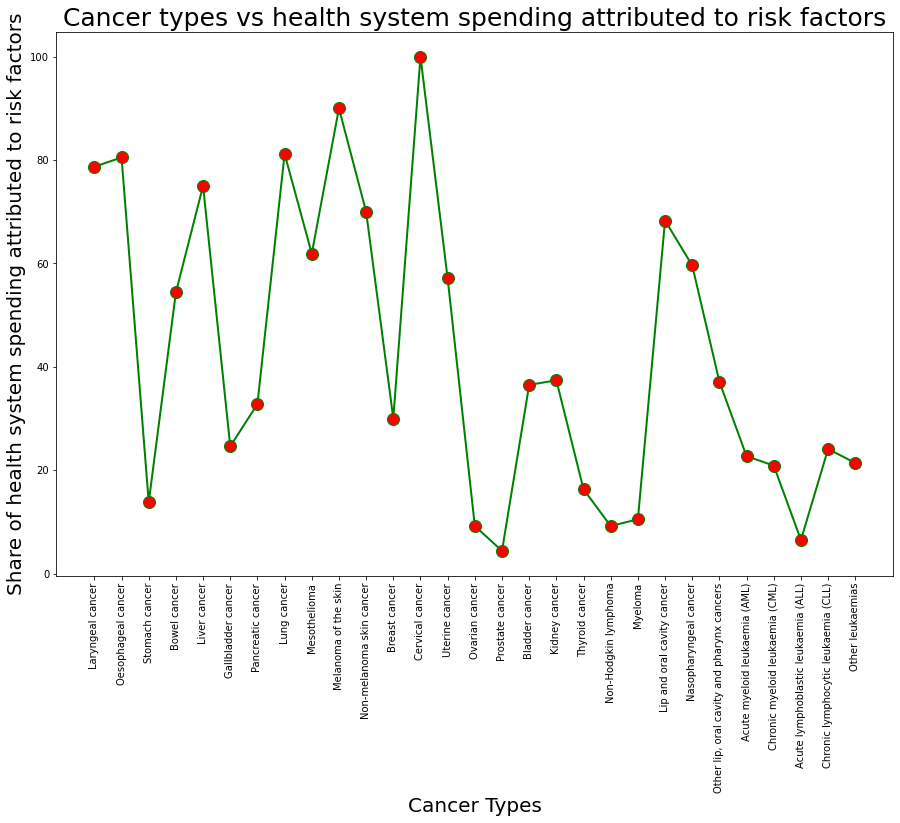

In [135]:
Cancer = cancer_data["Burden of disease condition"] 
# defined the y axis or tumor size list by calling the tumor size from the dataframe
spending_riskfactors = cancer_data['Share of health system spending attributed to risk factors  (%)'] 

plt.title('Cancer types vs health system spending attributed to risk factors',fontsize=25) # created title
# the plot function plt.plot() with x and y values and customizations
plt.plot(Cancer,spending_riskfactors,linewidth=2, markersize=12, color = 'green',
         linestyle = 'solid', marker = 'o',
         markerfacecolor = 'red') 
plt.xlabel('Cancer Types',fontsize=20)
plt.ylabel('Share of health system spending attributed to risk factors',fontsize=20)
plt.xticks(rotation = 90)
plt.rcParams["figure.figsize"] = [30,20]
plt.savefig('linechart')
plt.show()

As one risk factor can be the cause for different disesses . The analysis is further narrowed down to the risk factor and Government funding to address the particular risk factor.

In [136]:
risk_path = "table_2.csv"

risk1_gov_df = pd.read_csv(risk_path, delimiter=',',encoding='cp437', index_col=False)

risk1_gov_df

,Risk factor,Health system spending attributable to risk factor ($)
0,All risk factors combined,2.358978e+10
1,Overweight (including obesity),4.267904e+09
2,Tobacco use,3.286984e+09
3,High blood plasma glucose,3.186835e+09
4,Alcohol use,2.107697e+09
5,Impaired kidney function,1.946522e+09
6,High blood pressure,1.692718e+09
7,Illicit drug use,1.390658e+09
8,High sun exposure,1.242119e+09
9,Dietary risks,1.180177e+09


Remove the sum of all the risks to give more clarity for the study

In [137]:
risk1_gov_df = risk1_gov_df[risk1_gov_df['Risk factor'] != 'All risk factors combined']

Bar chart and Line chart- Risk factor vs government spending

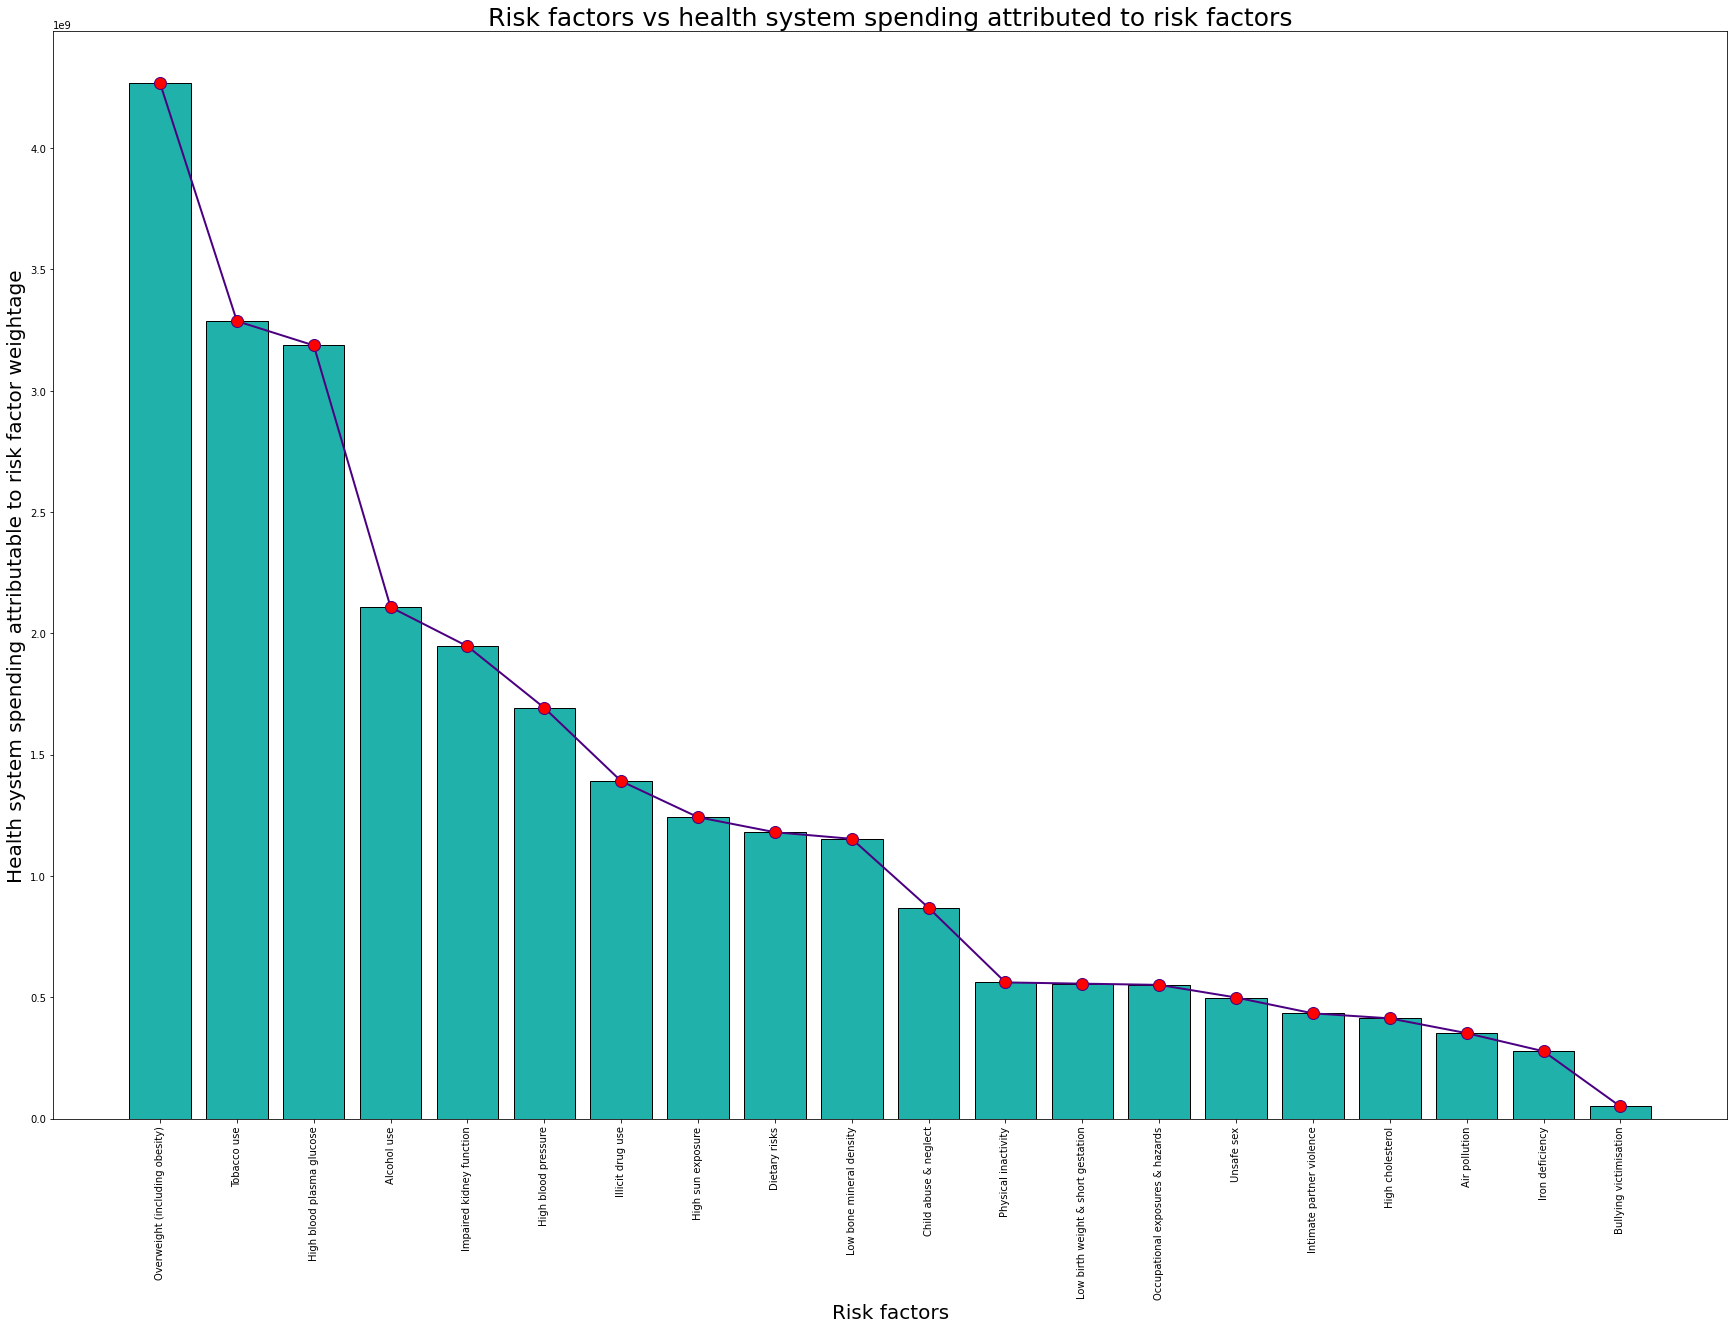

In [138]:
Riskfactor = risk1_gov_df["Risk factor"] 
# defined the y axis or tumor size list by calling the tumor size from the dataframe
spending_riskfactors =risk1_gov_df ['Health system spending attributable to risk factor ($)'] 

plt.title('Risk factors vs health system spending attributed to risk factors',fontsize=25) # created title
# the plot function plt.plot() with x and y values and customizations
plt.plot(Riskfactor,spending_riskfactors,linewidth=2, markersize=12, color = 'indigo',
         linestyle = 'solid', marker = 'o',
         markerfacecolor = 'red') 
plt.bar(Riskfactor, spending_riskfactors,color = "lightseagreen", width = .8,edgecolor= "black")
plt.xlabel('Risk factors',fontsize=20)
plt.ylabel('Health system spending attributable to risk factor weightage',fontsize=20)
plt.xticks(rotation = 90)
plt.rcParams["figure.figsize"] = [20,15]
plt.savefig('linechart')
plt.show()

AS THE HIGH SUN EXPOSURE IS ESTABLISHED AS THE TOP CAUSE OF SKIN CANCER. THE DATA OF ITS EFFECT IS CORRELATED TO AGE.

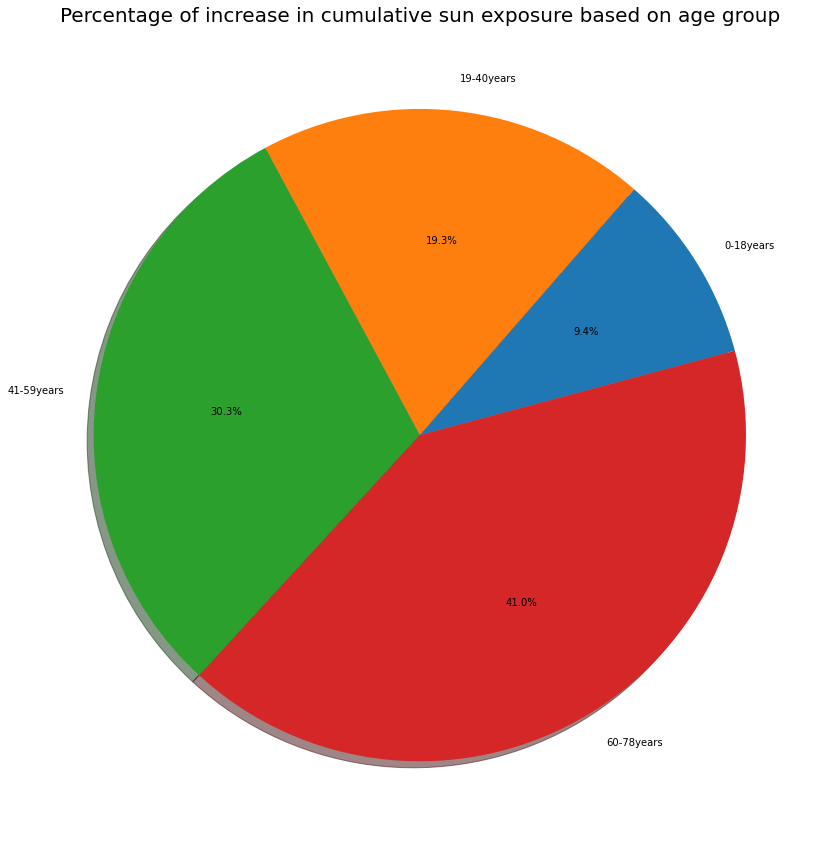

In [139]:
#Sun damage is cumulative. Only about 23 percent of lifetime exposure occurs by age 18
dataFrame = pd.DataFrame({"Ages": ['0-18years', '19-40years', '41-59years', '60-78years'],"Average Accumulated Sun Exposure": [23,47,74,100]})
plt.pie(dataFrame["Average Accumulated Sun Exposure"], labels = dataFrame["Ages"],autopct='%1.1f%%', startangle=15, shadow = True)
plt.title("Percentage of increase in cumulative sun exposure based on age group",fontsize=20)
plt.savefig('pie')
plt.show()

THE STUDY IS NOW FOCUSSED ON THE STATES OF AUSTRALIA AND SKIN CANCER COUNTS.

In [140]:
state_path = "table-m.csv"

state_gov_df = pd.read_csv(state_path, delimiter=',',encoding='utf-8', index_col=False)

state_gov_df

,Data type,Cancer group/site,Year,Sex,State or Territory,Count,Unnamed: 6
0,Incidence,Acute lymphoblastic leukaemia,1982,Males,New South Wales,54.00,
1,Incidence,Acute lymphoblastic leukaemia,1982,Males,Victoria,31.00,
2,Incidence,Acute lymphoblastic leukaemia,1982,Males,Queensland,20.00,
3,Incidence,Acute lymphoblastic leukaemia,1982,Males,Western Australia,4.00,
4,Incidence,Acute lymphoblastic leukaemia,1982,Males,South Australia,17.00,
...,...,...,...,...,...,...,...
119200,Mortality,Vulvar cancer,2017,Persons,South Australia,7.00,
119201,Mortality,Vulvar cancer,2017,Persons,Tasmania,0.00,
119202,Mortality,Vulvar cancer,2017,Persons,Australian Capital Territory,2.00,
119203,Mortality,Vulvar cancer,2017,Persons,Northern Territory,0.00,


DATA CLEANING

In [141]:
state_gov_df = state_gov_df.drop(columns=['Unnamed: 6'])                                                    
state_gov_df

,Data type,Cancer group/site,Year,Sex,State or Territory,Count
0,Incidence,Acute lymphoblastic leukaemia,1982,Males,New South Wales,54.00
1,Incidence,Acute lymphoblastic leukaemia,1982,Males,Victoria,31.00
2,Incidence,Acute lymphoblastic leukaemia,1982,Males,Queensland,20.00
3,Incidence,Acute lymphoblastic leukaemia,1982,Males,Western Australia,4.00
4,Incidence,Acute lymphoblastic leukaemia,1982,Males,South Australia,17.00
...,...,...,...,...,...,...
119200,Mortality,Vulvar cancer,2017,Persons,South Australia,7.00
119201,Mortality,Vulvar cancer,2017,Persons,Tasmania,0.00
119202,Mortality,Vulvar cancer,2017,Persons,Australian Capital Territory,2.00
119203,Mortality,Vulvar cancer,2017,Persons,Northern Territory,0.00


THE DATA IS NARROWED TO SKIN CANCER -INCIDENCE

In [142]:
state_incidence_data = state_gov_df.loc[state_gov_df['Data type'] == 'Incidence']
state1_incidence_data = state_incidence_data.loc[state_incidence_data['Cancer group/site']== 'Melanoma of the skin']
state1_incidence_data

,Data type,Cancer group/site,Year,Sex,State or Territory,Count
30861,Incidence,Melanoma of the skin,1982,Males,New South Wales,650.00
30862,Incidence,Melanoma of the skin,1982,Males,Victoria,280.00
30863,Incidence,Melanoma of the skin,1982,Males,Queensland,474.00
30864,Incidence,Melanoma of the skin,1982,Males,Western Australia,165.00
30865,Incidence,Melanoma of the skin,1982,Males,South Australia,121.00
...,...,...,...,...,...,...
31828,Incidence,Melanoma of the skin,2017,Persons,South Australia,814.00
31829,Incidence,Melanoma of the skin,2017,Persons,Tasmania,334.00
31830,Incidence,Melanoma of the skin,2017,Persons,Australian Capital Territory,184.00
31831,Incidence,Melanoma of the skin,2017,Persons,Northern Territory,0.00


MALE COUNT+FEMALE COUNT = PERSONS , REPEAT DATA REMOVED

In [143]:
state1_incidence_data=state1_incidence_data.loc[state1_incidence_data['Sex'] == 'Persons']
state1_incidence_data

,Data type,Cancer group/site,Year,Sex,State or Territory,Count
30879,Incidence,Melanoma of the skin,1982,Persons,New South Wales,1301.00
30880,Incidence,Melanoma of the skin,1982,Persons,Victoria,645.00
30881,Incidence,Melanoma of the skin,1982,Persons,Queensland,902.00
30882,Incidence,Melanoma of the skin,1982,Persons,Western Australia,338.00
30883,Incidence,Melanoma of the skin,1982,Persons,South Australia,248.00
...,...,...,...,...,...,...
31828,Incidence,Melanoma of the skin,2017,Persons,South Australia,814.00
31829,Incidence,Melanoma of the skin,2017,Persons,Tasmania,334.00
31830,Incidence,Melanoma of the skin,2017,Persons,Australian Capital Territory,184.00
31831,Incidence,Melanoma of the skin,2017,Persons,Northern Territory,0.00


In [144]:
state1_incidence_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 324 entries, 30879 to 31832
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Data type           324 non-null    object
 1   Cancer group/site   324 non-null    object
 2   Year                324 non-null    int64 
 3   Sex                 324 non-null    object
 4   State or Territory  324 non-null    object
 5   Count               324 non-null    object
dtypes: int64(1), object(5)
memory usage: 17.7+ KB


THE DATA IS GROUPED BY STATE AND THEN YEAR FOR FURTHER ANALYSIS

In [145]:
state_list=[ 'New South Wales','Victoria', 'South Australia','Queensland','Tasmania','Australian Capital Territory','Western Australia','Northern Territory']

summary_stat1_df=state1_incidence_data[state1_incidence_data["State or Territory"].isin(state_list)]

state_data_df =summary_stat1_df.groupby(['State or Territory','Year'],as_index=False).agg(state_counts=('Count', lambda x: list(x)[-1]))
state_data_df



,State or Territory,Year,state_counts
0,Australian Capital Territory,1982,0.00
1,Australian Capital Territory,1983,0.00
2,Australian Capital Territory,1984,0.00
3,Australian Capital Territory,1985,0.00
4,Australian Capital Territory,1986,57.00
...,...,...,...
283,Western Australia,2013,1317.00
284,Western Australia,2014,1304.00
285,Western Australia,2015,1569.00
286,Western Australia,2016,1546.00


In [146]:
state_data_df['state_counts'] = pd.to_numeric(state_data_df['state_counts'], errors='coerce')
state_data_df['state_counts'] = state_data_df['state_counts'].fillna(0)   
state_data_df

,State or Territory,Year,state_counts
0,Australian Capital Territory,1982,0.0
1,Australian Capital Territory,1983,0.0
2,Australian Capital Territory,1984,0.0
3,Australian Capital Territory,1985,0.0
4,Australian Capital Territory,1986,57.0
...,...,...,...
283,Western Australia,2013,1317.0
284,Western Australia,2014,1304.0
285,Western Australia,2015,1569.0
286,Western Australia,2016,1546.0


THE COUNT IS EXPRESSED IN A DATAFRAME  WITH COUNTS EXPRESSED IN RELATION TO YEAR AND STATES

In [147]:
count_nt = []
count_nsw = []
count_vic = []
count_sa = []
count_ql = []
count_tas = []
count_act = []
count_wa = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for index, row in state_data_df.iterrows():
    if row["State or Territory"] == 'New South Wales':
        count_nsw.append(row['state_counts'])
    if row["State or Territory"] == 'Victoria':
        count_vic.append(row['state_counts'])
    if row["State or Territory"] == 'South Australia':
        count_sa.append(row['state_counts'])
    if row["State or Territory"] =='Queensland' :
        count_ql.append(row['state_counts'])
    if row["State or Territory"] =='Tasmania' :
        count_tas.append(row['state_counts'])
    if row["State or Territory"] =='Western Australia' :
        count_wa.append(row['state_counts'])
    if row["State or Territory"] =='Northern Territory' :
        count_nt.append(row['state_counts']) 
    if row["State or Territory"] =='Australian Capital Territory' :
        count_act.append(row['state_counts'])
    
        
    # add subset 
#created a data frame with the tumor data of the drugs listed.
a ={'New South Wales':count_nsw,
    'Victoria':count_vic,
    'South Australia':count_sa,
    'Queensland':count_ql,
    'Tasmania':count_tas,
    'Australian Capital Territory':count_act,
    'Northern Territory':count_nt,
    'Western Australia':count_wa,
    
   }

count_df= pd.DataFrame.from_dict(a, orient='index') 
count_df = count_df.fillna(0)

in_df= count_df.T
in_df

,New South Wales,Victoria,South Australia,Queensland,Tasmania,Australian Capital Territory,Northern Territory,Western Australia
0,1301.0,645.0,248.0,902.0,68.0,0.0,0.0,338.0
1,1424.0,721.0,268.0,913.0,76.0,0.0,0.0,330.0
2,1500.0,745.0,284.0,1040.0,66.0,0.0,0.0,347.0
3,1613.0,868.0,364.0,1082.0,80.0,0.0,0.0,420.0
4,1701.0,827.0,356.0,1241.0,87.0,57.0,11.0,410.0
5,2109.0,997.0,386.0,1367.0,111.0,69.0,13.0,481.0
6,2271.0,1124.0,458.0,1367.0,130.0,76.0,18.0,547.0
7,2112.0,1110.0,435.0,1384.0,115.0,79.0,20.0,485.0
8,2111.0,1100.0,468.0,1391.0,151.0,80.0,22.0,513.0
9,2110.0,1129.0,460.0,1420.0,143.0,79.0,26.0,604.0


BASED ON 36 YERRS OF STUDY THE DATA IS STUDIED FOR MINIMUM,MAXIMUM AND OUTLIERS

In [148]:
state_list=['New South Wales','Victoria','South Australia','Queensland','Tasmania','Australian Capital Territory','Northern Territory','Western Australia']
counter=[]
for state in state_list:
    quartiles = count_df.T[state].quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    midq = quartiles[.5].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)
    max_count = count_df.T[state].max()
    min_count = count_df.T[state].min()
    
    
    # Check if it is the first time through the for loop, if so then print dividing line at top only
    if counter == 0:
        print(f"--------------------------------------------------------")
    print(f"{state} IQR data is:")
    print(f"The lower quartile of tumor volume for {state} is: {lowerq}")
    print(f"The upper quartile of tumor volume for {state} is: {upperq}")
    print(f"The median of tumor volume for {state} is: {midq}")
    print(f"The interquartile range of tumor volume for {state} is: {iqr}")
    print(f"Values below {lower_bound} for {state} could be outliers.")
    print(f"Values above {upper_bound} for {state} could be outliers.")
    print(f"The maximum value  of tumor volume for {state} is: {max_count}")
    print(f"The minimum value  of tumor volume for {state} is: {min_count}")
    print(f"--------------------------------------------------------")


New South Wales IQR data is:
The lower quartile of tumor volume for New South Wales is: 2162.25
The upper quartile of tumor volume for New South Wales is: 3666.5
The median of tumor volume for New South Wales is: 2812.0
The interquartile range of tumor volume for New South Wales is: 1504.25
Values below -94.12 for New South Wales could be outliers.
Values above 5922.88 for New South Wales could be outliers.
The maximum value  of tumor volume for New South Wales is: 4794.0
The minimum value  of tumor volume for New South Wales is: 1301.0
--------------------------------------------------------
Victoria IQR data is:
The lower quartile of tumor volume for Victoria is: 1127.75
The upper quartile of tumor volume for Victoria is: 2242.5
The median of tumor volume for Victoria is: 1734.5
The interquartile range of tumor volume for Victoria is: 1114.75
Values below -544.38 for Victoria could be outliers.
Values above 3914.62 for Victoria could be outliers.
The maximum value  of tumor volume fo

BOXPLOT FOR THE ABOVE ANALYSIS

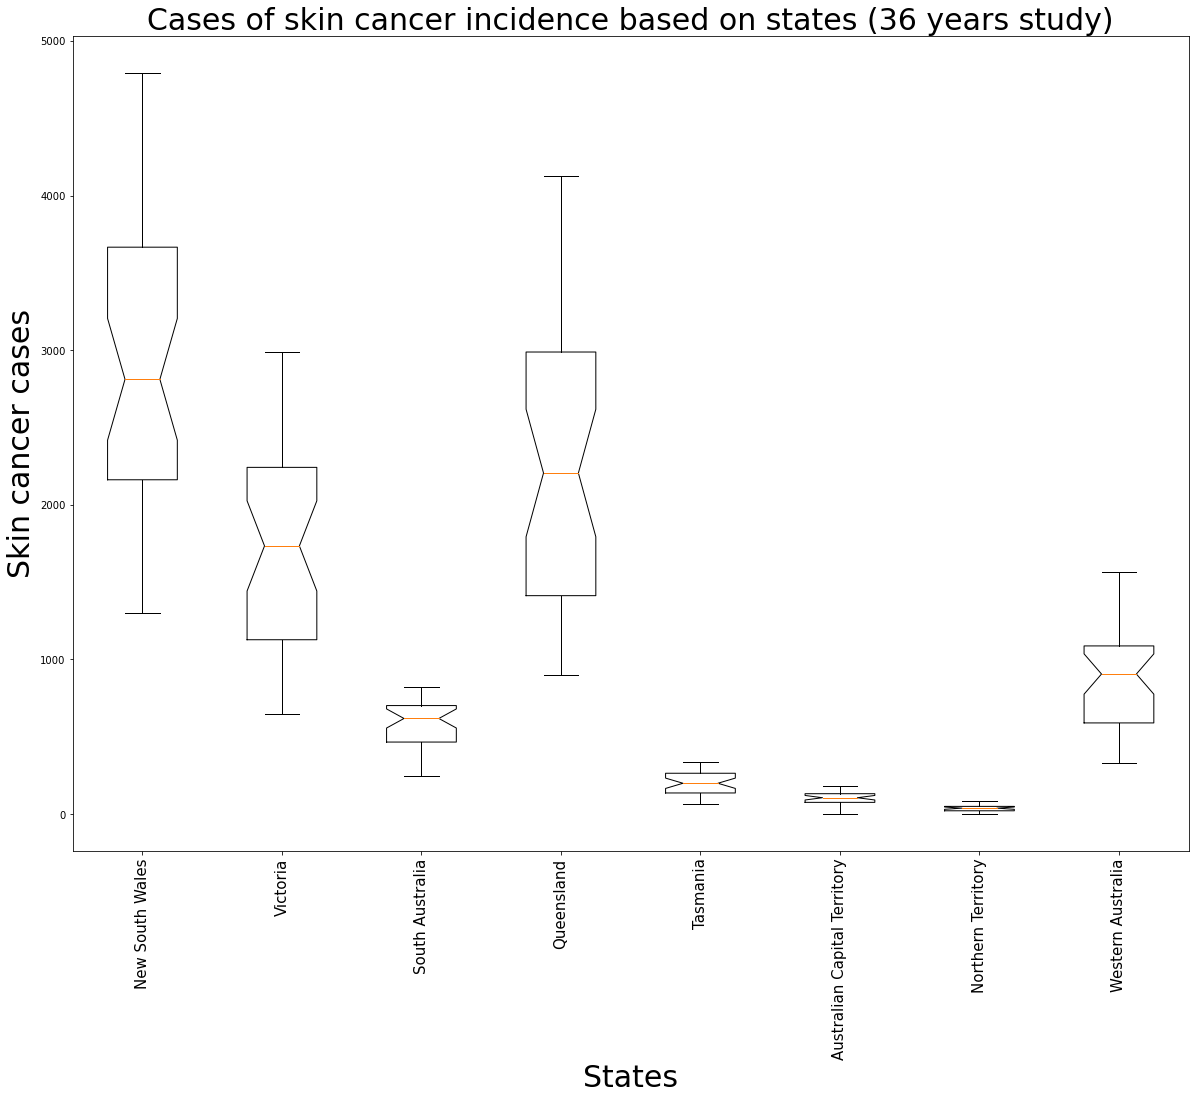

In [149]:
plot_list =   [ count_df.T['New South Wales'],
                count_df.T['Victoria'],
                count_df.T['South Australia'],
                count_df.T['Queensland'],
                count_df.T['Tasmania'],
                count_df.T['Australian Capital Territory'],
                count_df.T['Northern Territory'],
                count_df.T['Western Australia']
              ]
               
fig1, ax = plt.subplots(figsize=(20,15))               
ax.set_title('Cases of skin cancer incidence based on states (36 years study)',fontsize=30) 
ax.set_xlabel('States',fontsize=30) 
ax.set_ylabel('Skin cancer cases',fontsize=30)                               
plt.xticks(rotation = 90)    
ax.boxplot(plot_list,notch=True,sym='gD')              
plt.xticks([1,2,3,4,5,6,7,8],state_list,fontsize=15) 
# set labels of each boxplot
plt.savefig('boxplot')
plt.show()

THE SAME STUDY IS REPEATED ON- THE MORTALITY DUE TO SKIN CANCER

In [150]:
state_mortality_data = state_gov_df.loc[state_gov_df['Data type'] == 'Mortality']
state1_mortality_data = state_mortality_data.loc[state_mortality_data['Cancer group/site']== 'Melanoma of the skin']
state1_mortality_data

,Data type,Cancer group/site,Year,Sex,State or Territory,Count
90531,Mortality,Melanoma of the skin,1982,Males,New South Wales,165.00
90532,Mortality,Melanoma of the skin,1982,Males,Victoria,82.00
90533,Mortality,Melanoma of the skin,1982,Males,Queensland,61.00
90534,Mortality,Melanoma of the skin,1982,Males,Western Australia,38.00
90535,Mortality,Melanoma of the skin,1982,Males,South Australia,22.00
...,...,...,...,...,...,...
91498,Mortality,Melanoma of the skin,2017,Persons,South Australia,81.00
91499,Mortality,Melanoma of the skin,2017,Persons,Tasmania,34.00
91500,Mortality,Melanoma of the skin,2017,Persons,Australian Capital Territory,21.00
91501,Mortality,Melanoma of the skin,2017,Persons,Northern Territory,4.00


In [151]:
state1_mortality_data=state1_mortality_data.loc[state1_mortality_data['Sex'] == 'Persons']
state1_mortality_data

,Data type,Cancer group/site,Year,Sex,State or Territory,Count
90549,Mortality,Melanoma of the skin,1982,Persons,New South Wales,237.00
90550,Mortality,Melanoma of the skin,1982,Persons,Victoria,146.00
90551,Mortality,Melanoma of the skin,1982,Persons,Queensland,92.00
90552,Mortality,Melanoma of the skin,1982,Persons,Western Australia,54.00
90553,Mortality,Melanoma of the skin,1982,Persons,South Australia,48.00
...,...,...,...,...,...,...
91498,Mortality,Melanoma of the skin,2017,Persons,South Australia,81.00
91499,Mortality,Melanoma of the skin,2017,Persons,Tasmania,34.00
91500,Mortality,Melanoma of the skin,2017,Persons,Australian Capital Territory,21.00
91501,Mortality,Melanoma of the skin,2017,Persons,Northern Territory,4.00


In [152]:
State_list=[ 'New South Wales','Victoria', 'South Australia','Queensland','Tasmania','Australian Capital Territory','Western Australia','Northern Territory']

summary_stat_df=state1_mortality_data[state1_mortality_data["State or Territory"].isin(State_list)]

state_data1_df =summary_stat_df.groupby(['State or Territory','Year'],as_index=False).agg(state_counts=('Count', lambda x: list(x)[-1]))
state_data1_df
state_data1_df['state_counts'] = pd.to_numeric(state_data1_df['state_counts'], errors='coerce')
state_data1_df['state_counts'] = state_data1_df['state_counts'].fillna(0)   
state_data1_df

,State or Territory,Year,state_counts
0,Australian Capital Territory,1982,5.0
1,Australian Capital Territory,1983,4.0
2,Australian Capital Territory,1984,7.0
3,Australian Capital Territory,1985,6.0
4,Australian Capital Territory,1986,11.0
...,...,...,...
283,Western Australia,2013,154.0
284,Western Australia,2014,150.0
285,Western Australia,2015,161.0
286,Western Australia,2016,126.0


In [153]:
count_nt1 = []
count_nsw1 = []
count_vic1 = []
count_sa1 = []
count_ql1 = []
count_tas1 = []
count_act1 = []
count_wa1 = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for index, row in state_data1_df.iterrows():
    if row["State or Territory"] == 'New South Wales':
        count_nsw1.append(row['state_counts'])
    if row["State or Territory"] == 'Victoria':
        count_vic1.append(row['state_counts'])
    if row["State or Territory"] == 'South Australia':
        count_sa1.append(row['state_counts'])
    if row["State or Territory"] =='Queensland' :
        count_ql1.append(row['state_counts'])
    if row["State or Territory"] =='Tasmania' :
        count_tas1.append(row['state_counts'])
    if row["State or Territory"] =='Western Australia' :
        count_wa1.append(row['state_counts'])
    if row["State or Territory"] =='Northern Territory' :
        count_nt1.append(row['state_counts']) 
    if row["State or Territory"] =='Australian Capital Territory' :
        count_act1.append(row['state_counts'])
    
        
    # add subset 
#created a data frame with the tumor data of the drugs listed.
a ={'New South Wales':count_nsw1,
    'Victoria':count_vic1,
    'South Australia':count_sa1,
    'Queensland':count_ql1,
    'Tasmania':count_tas1,
    'Australian Capital Territory':count_act1,
    'Northern Territory':count_nt1,
    'Western Australia':count_wa1,
    
   }

count1_df= pd.DataFrame.from_dict(a, orient='index') 
count1_df = count1_df.fillna(0)
#count1_df.T = DataFrame(index = idx,Year= ([1982, 1983, 1984, 1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017])
df_trans = count1_df.T
df_trans

,New South Wales,Victoria,South Australia,Queensland,Tasmania,Australian Capital Territory,Northern Territory,Western Australia
0,237.0,146.0,48.0,92.0,13.0,5.0,1.0,54.0
1,235.0,175.0,40.0,101.0,24.0,4.0,3.0,41.0
2,247.0,151.0,54.0,112.0,18.0,7.0,3.0,48.0
3,267.0,150.0,41.0,121.0,24.0,6.0,3.0,60.0
4,265.0,147.0,56.0,132.0,18.0,11.0,1.0,58.0
5,302.0,176.0,62.0,146.0,24.0,14.0,3.0,71.0
6,296.0,182.0,60.0,143.0,18.0,8.0,0.0,65.0
7,296.0,175.0,78.0,144.0,11.0,7.0,2.0,69.0
8,326.0,178.0,77.0,135.0,23.0,16.0,5.0,69.0
9,320.0,178.0,56.0,149.0,22.0,15.0,5.0,59.0


In [154]:
state_list=['New South Wales','Victoria','South Australia','Queensland','Tasmania','Australian Capital Territory','Northern Territory','Western Australia']
counter=[]
for state in state_list:
    quartiles = count1_df.T[state].quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    midq = quartiles[.5].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)
    max_cs = count1_df.T[state].max()
    min_cs = count1_df.T[state].min()
    
    
    # Check if it is the first time through the for loop, if so then print dividing line at top only
    if counter == 0:
        print(f"--------------------------------------------------------")
    print(f"{state} IQR data is:")
    print(f"The lower quartile of tumor volume for {state} is: {lowerq}")
    print(f"The upper quartile of tumor volume for {state} is: {upperq}")
    print(f"The median of tumor volume for {state} is: {midq}")
    print(f"The interquartile range of tumor volume for {state} is: {iqr}")
    print(f"Values below {lower_bound} for {state} could be outliers.")
    print(f"Values above {upper_bound} for {state} could be outliers.")
    print(f"The maximum value  of tumor volume for {state} is: {max_cs}")
    print(f"The minimum value  of tumor volume for {state} is: {min_cs}")
    print(f"--------------------------------------------------------")


New South Wales IQR data is:
The lower quartile of tumor volume for New South Wales is: 323.0
The upper quartile of tumor volume for New South Wales is: 484.5
The median of tumor volume for New South Wales is: 368.0
The interquartile range of tumor volume for New South Wales is: 161.5
Values below 80.75 for New South Wales could be outliers.
Values above 726.75 for New South Wales could be outliers.
The maximum value  of tumor volume for New South Wales is: 547.0
The minimum value  of tumor volume for New South Wales is: 235.0
--------------------------------------------------------
Victoria IQR data is:
The lower quartile of tumor volume for Victoria is: 181.0
The upper quartile of tumor volume for Victoria is: 279.0
The median of tumor volume for Victoria is: 214.0
The interquartile range of tumor volume for Victoria is: 98.0
Values below 34.0 for Victoria could be outliers.
Values above 426.0 for Victoria could be outliers.
The maximum value  of tumor volume for Victoria is: 353.0
T

THE STUDY IS EXPRESSED IN A LINE CHART FOR EVERY STATE

<AxesSubplot:xlabel='Year'>

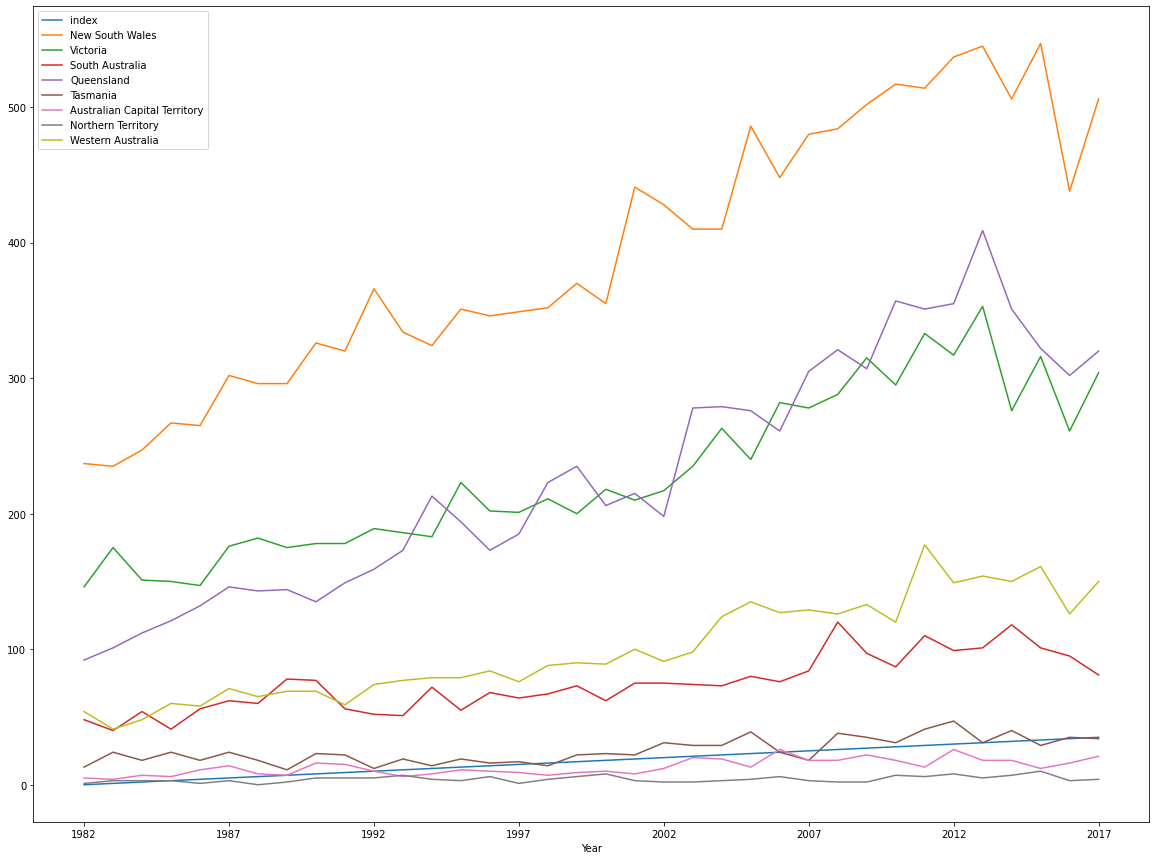

In [155]:
Year= ['1982', '1983', '1984','1985','1986','1987','1988','1989','1990','1991','1992','1993','1994','1995','1996','1997','1998','1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017']
Year_df=pd.DataFrame (Year, columns = ['Year'])

df = Year_df.reset_index().merge(df_trans.reset_index(), left_index=False, right_index=False, how='left')
df1= df.reset_index(drop=True)
df1.set_index('Year').plot()                             

AS THE COUNT CANNOT BE STUDIED INDEPENDENT OF THE THE TOTAL Population. THE CSV FILE HAS DATA OF 40N YEARS OF POPULATION OF DIFFERENT STATES OF AUSTRALIA

In [156]:
popul_path = "population_data.csv"

popul_gov_df = pd.read_csv(popul_path, delimiter=',',encoding='cp437', index_col=False)

popul_gov_df

,Timeline,New South Wales,Victoria,Queensland,South Australia,Western Australia,Tasmania,Northern Territory,Australian Capital Territory
0,Jun-1981,5234889.0,3946917.0,2345208.0,1318769.0,1300056.0,427224.0,122616.0,227581.0
1,Sep-1981,5249455.0,3957333.0,2367477.0,1321235.0,1311284.0,427925.0,125186.0,228782.0
2,Dec-1981,5266894.0,3968398.0,2387943.0,1325176.0,1320221.0,428283.0,127718.0,229484.0
3,Mar-1982,5286119.0,3980826.0,2406355.0,1328670.0,1329700.0,429445.0,129593.0,230990.0
4,Jun-1982,5303580.0,3992870.0,2424586.0,1331108.0,1338899.0,429845.0,130314.0,233045.0
...,...,...,...,...,...,...,...,...,...
157,Sep-2020,8162575.0,6675778.0,5182756.0,1770236.0,2667371.0,540650.0,246450.0,430777.0
158,Dec-2020,8168067.0,6658164.0,5193380.0,1770505.0,2670869.0,540894.0,246167.0,430825.0
159,Mar-2021,8175127.0,6649656.0,5206951.0,1772015.0,2677146.0,541488.0,246289.0,431233.0
160,Jun-2021,8188651.0,6649066.0,5221233.0,1773396.0,2682257.0,541315.0,245909.0,431611.0


In [157]:
list(popul_gov_df)

['Timeline',
 'New South Wales',
 'Victoria',
 'Queensland',
 'South Australia',
 'Western Australia',
 'Tasmania',
 'Northern Territory',
 'Australian Capital Territory']

THE MEAN OF POPULATION IS CALCULATED FOR FURTHER STUDIES(40 YEARS OF DATA)

In [158]:
df2 = popul_gov_df[['New South Wales','Victoria','South Australia','Queensland','Tasmania','Australian Capital Territory','Northern Territory','Western Australia']].mean()
df2

New South Wales                 6.585195e+06
Victoria                        5.013300e+06
South Australia                 1.533923e+06
Queensland                      3.712402e+06
Tasmania                        4.833123e+05
Australian Capital Territory    3.278111e+05
Northern Territory              1.977477e+05
Western Australia               1.972408e+06
dtype: float64

THE MEAN OF INCIDENCE OF MELANOMA (36 YEARS OF DATA)

In [159]:
df4= in_df[['New South Wales','Victoria','South Australia','Queensland','Tasmania','Australian Capital Territory','Northern Territory','Western Australia']].mean()
df4

New South Wales                 2975.694444
Victoria                        1713.888889
South Australia                  589.083333
Queensland                      2280.555556
Tasmania                         198.944444
Australian Capital Territory      97.416667
Northern Territory                36.750000
Western Australia                867.777778
dtype: float64

THE MEAN OF MORTALITY OF MELANOMA (36 YEARS OF DATA)

In [160]:
df3 = df[['New South Wales','Victoria','South Australia','Queensland','Tasmania','Australian Capital Territory','Northern Territory','Western Australia']].mean()
df3

New South Wales                 392.694444
Victoria                        229.277778
South Australia                  74.500000
Queensland                      228.972222
Tasmania                         25.111111
Australian Capital Territory     13.083333
Northern Territory                4.083333
Western Australia                99.444444
dtype: float64

THE THREE DATA SETS ARE JOINED ON STATES

In [161]:
new_df=pd.concat([df4,df3,df2], axis=1)
new_df

,0,1,2
New South Wales,2975.694444,392.694444,6.585195e+06
Victoria,1713.888889,229.277778,5.013300e+06
South Australia,589.083333,74.500000,1.533923e+06
Queensland,2280.555556,228.972222,3.712402e+06
Tasmania,198.944444,25.111111,4.833123e+05
Australian Capital Territory,97.416667,13.083333,3.278111e+05
Northern Territory,36.750000,4.083333,1.977477e+05
Western Australia,867.777778,99.444444,1.972408e+06


LABELING THE COLUMNS

In [162]:
new_df.columns = ['Incidence_Counts', 'Mortality_Counts', 'Total_avg_population']
new_df

,Incidence_Counts,Mortality_Counts,Total_avg_population
New South Wales,2975.694444,392.694444,6.585195e+06
Victoria,1713.888889,229.277778,5.013300e+06
South Australia,589.083333,74.500000,1.533923e+06
Queensland,2280.555556,228.972222,3.712402e+06
Tasmania,198.944444,25.111111,4.833123e+05
Australian Capital Territory,97.416667,13.083333,3.278111e+05
Northern Territory,36.750000,4.083333,1.977477e+05
Western Australia,867.777778,99.444444,1.972408e+06


LABELING THE INDEX AND PERCENTAGE OF INCIDENCE AND MORTALITY COUNTS TO POPULATION IS CALCULATED

In [163]:
new_df.index.name='State'
new_df

,Incidence_Counts,Mortality_Counts,Total_avg_population
State,,,
New South Wales,2975.694444,392.694444,6.585195e+06
Victoria,1713.888889,229.277778,5.013300e+06
South Australia,589.083333,74.500000,1.533923e+06
Queensland,2280.555556,228.972222,3.712402e+06
Tasmania,198.944444,25.111111,4.833123e+05
Australian Capital Territory,97.416667,13.083333,3.278111e+05
Northern Territory,36.750000,4.083333,1.977477e+05
Western Australia,867.777778,99.444444,1.972408e+06


In [164]:
new_df['incidence_percent'] = (new_df['Incidence_Counts'] / 
                      new_df['Total_avg_population']) * 100
new_df['mortality_percent'] = (new_df['Mortality_Counts'] / 
                      new_df['Total_avg_population']) * 100
new_df

,Incidence_Counts,Mortality_Counts,Total_avg_population,incidence_percent,mortality_percent
State,,,,,
New South Wales,2975.694444,392.694444,6.585195e+06,0.045188,0.005963
Victoria,1713.888889,229.277778,5.013300e+06,0.034187,0.004573
South Australia,589.083333,74.500000,1.533923e+06,0.038404,0.004857
Queensland,2280.555556,228.972222,3.712402e+06,0.061431,0.006168
Tasmania,198.944444,25.111111,4.833123e+05,0.041163,0.005196
Australian Capital Territory,97.416667,13.083333,3.278111e+05,0.029717,0.003991
Northern Territory,36.750000,4.083333,1.977477e+05,0.018584,0.002065
Western Australia,867.777778,99.444444,1.972408e+06,0.043996,0.005042


THE INCIDENCE AND MORTALITY  AS PERCENTAE OF TOTAL POPULATION IS PLOTTED IN A LINE GRAPH

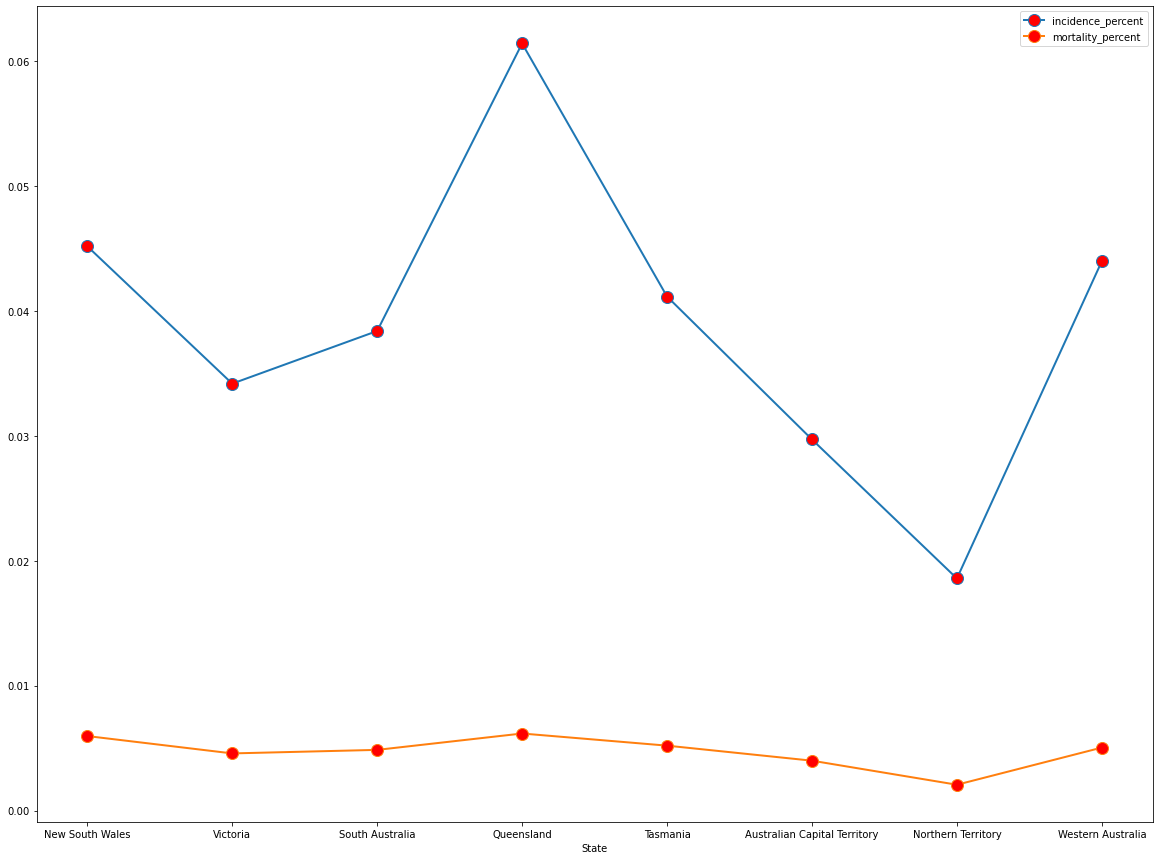

In [165]:
new_df.plot(kind = 'line', y = ['incidence_percent', 'mortality_percent'],linewidth=2, markersize=12,linestyle = 'solid', marker = 'o', markerfacecolor = 'red')
plt.savefig('lineplot')

FOR THE ACCURACY OF STUDIES THE THE POPULATION IS FURTHER NARROWED TO PERKM2 AS DIFFERENT STAES HAVE BIG DIFFRENCES IN AREA.
SECONDLY THE ETHINICITY PLAYS A IMPORTANT ROLE IN SKIN CANCER NAD UV RADIATION ABSORPTION.

In [166]:
State_list=[ 'New South Wales','Victoria', 'South Australia','Queensland','Tasmania','Australian Capital Territory','Western Australia','Northern Territory']
Population_state_perkmsq =[8.64,23.54,1.62,2.5,7.24,151.49,0.89,0.16]
indigenous_population_percentage_total=[3.5,0.9,2.6,4.7,5.8,1.9,4.1,30.9]
pop_ar_eth_lst = list(zip(State_list ,Population_state_perkmsq,indigenous_population_percentage_total))
population_area_ethinicity=pd.DataFrame(pop_ar_eth_lst, columns = ['State', 'Population of state perkm2','Indigenous population'])
population_area_ethinicity

,State,Population of state perkm2,Indigenous population
0,New South Wales,8.64,3.5
1,Victoria,23.54,0.9
2,South Australia,1.62,2.6
3,Queensland,2.50,4.7
4,Tasmania,7.24,5.8
5,Australian Capital Territory,151.49,1.9
6,Western Australia,0.89,4.1
7,Northern Territory,0.16,30.9


MERGING THE DATA FRAME WITH INCIDENCE AND MORTALITY COUNTS DATAFRAME.

In [167]:
new_df1=new_df.merge(population_area_ethinicity, how='outer', on='State')
new_df1

,State,Incidence_Counts,Mortality_Counts,Total_avg_population,incidence_percent,mortality_percent,Population of state perkm2,Indigenous population
0,New South Wales,2975.694444,392.694444,6.585195e+06,0.045188,0.005963,8.64,3.5
1,Victoria,1713.888889,229.277778,5.013300e+06,0.034187,0.004573,23.54,0.9
2,South Australia,589.083333,74.500000,1.533923e+06,0.038404,0.004857,1.62,2.6
3,Queensland,2280.555556,228.972222,3.712402e+06,0.061431,0.006168,2.50,4.7
4,Tasmania,198.944444,25.111111,4.833123e+05,0.041163,0.005196,7.24,5.8
5,Australian Capital Territory,97.416667,13.083333,3.278111e+05,0.029717,0.003991,151.49,1.9
6,Northern Territory,36.750000,4.083333,1.977477e+05,0.018584,0.002065,0.16,30.9
7,Western Australia,867.777778,99.444444,1.972408e+06,0.043996,0.005042,0.89,4.1


THE INCIDENCE AND MORTALITY IS FURTHER NARROWED DOWN TO COUNTS PER POPULATION PER KM2.

In [168]:
new_df1['inci_pop_perkm2'] = (new_df1['Incidence_Counts'] / 
                      new_df1['Population of state perkm2'])
new_df1['mor_pop_perkm2'] = (new_df1['Mortality_Counts'] / 
                      new_df1['Population of state perkm2'])
new_df2= new_df1.set_index('State')
new_df2

,Incidence_Counts,Mortality_Counts,Total_avg_population,incidence_percent,mortality_percent,Population of state perkm2,Indigenous population,inci_pop_perkm2,mor_pop_perkm2
State,,,,,,,,,
New South Wales,2975.694444,392.694444,6.585195e+06,0.045188,0.005963,8.64,3.5,344.409079,45.450746
Victoria,1713.888889,229.277778,5.013300e+06,0.034187,0.004573,23.54,0.9,72.807514,9.739923
South Australia,589.083333,74.500000,1.533923e+06,0.038404,0.004857,1.62,2.6,363.631687,45.987654
Queensland,2280.555556,228.972222,3.712402e+06,0.061431,0.006168,2.50,4.7,912.222222,91.588889
Tasmania,198.944444,25.111111,4.833123e+05,0.041163,0.005196,7.24,5.8,27.478514,3.468386
Australian Capital Territory,97.416667,13.083333,3.278111e+05,0.029717,0.003991,151.49,1.9,0.643057,0.086364
Northern Territory,36.750000,4.083333,1.977477e+05,0.018584,0.002065,0.16,30.9,229.687500,25.520833
Western Australia,867.777778,99.444444,1.972408e+06,0.043996,0.005042,0.89,4.1,975.031211,111.735331


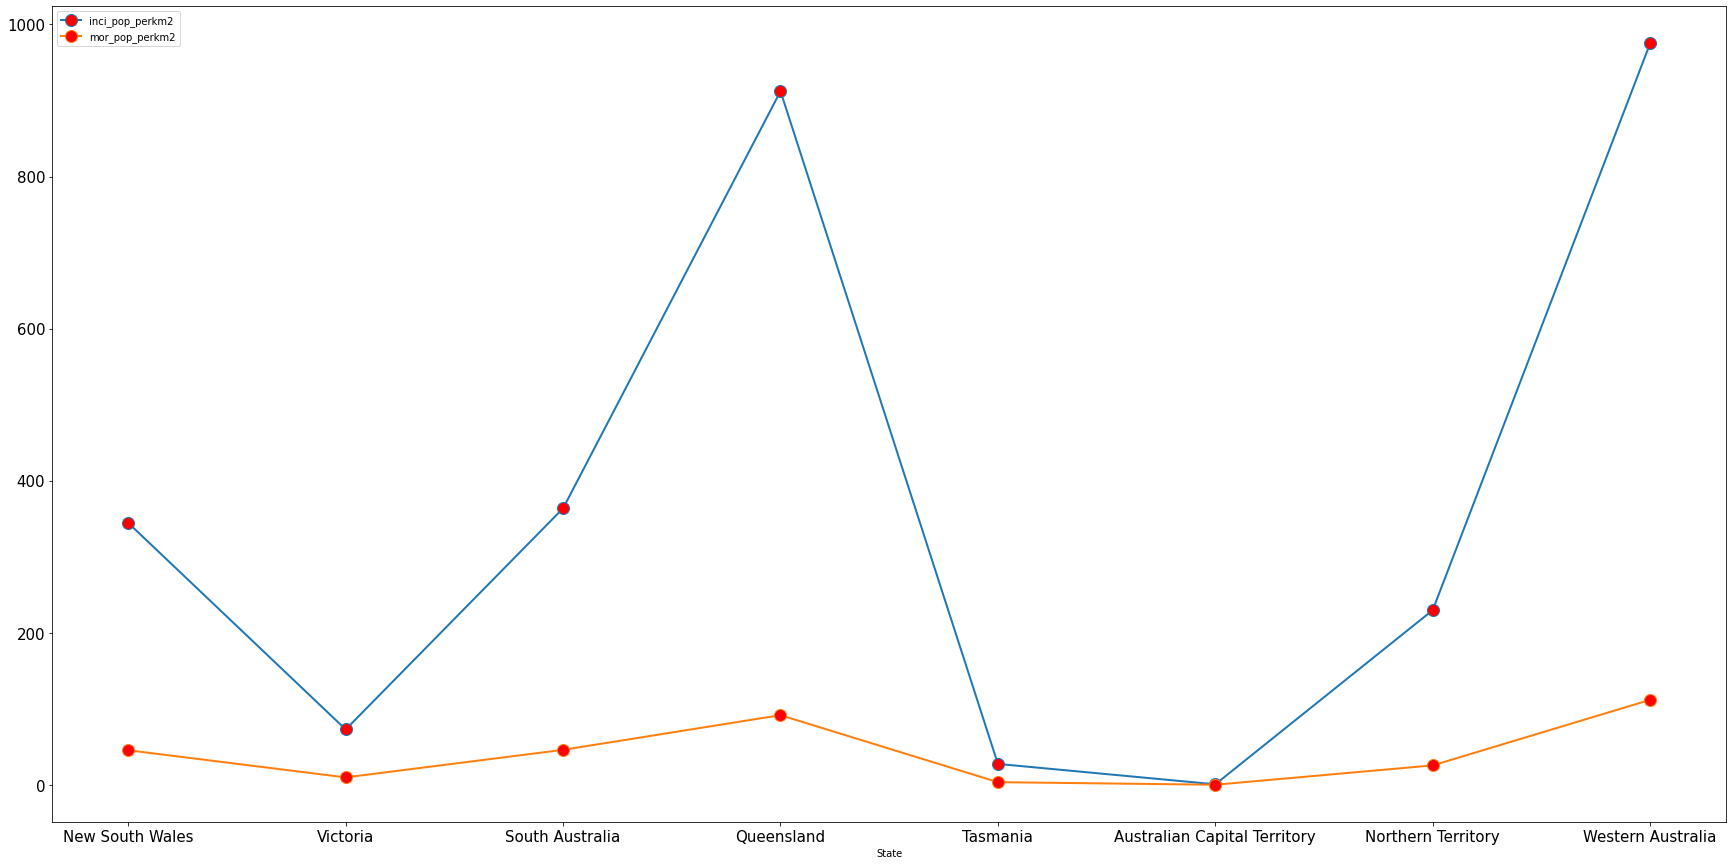

In [169]:
new_df2.plot(kind = 'line', y = ['inci_pop_perkm2', 'mor_pop_perkm2'],linewidth=2, markersize=12,linestyle = 'solid', marker = 'o', markerfacecolor = 'red',fontsize=15,figsize=[30,15])
plt.savefig('lineplot1')

THE ANALYSIS TO ESTABLISH THE CORRELATION OF ETHINICITY AND SKIN CANCER . THE POPULATION OF THE STATE IS FURTHER STUDIED BASED ON THE INDIGENOUS POPULATION.

In [170]:
correlationWV = st.pearsonr(new_df2['Indigenous population'],new_df2['Incidence_Counts'])
print(f"The correlation between Incidence of skin cancer and Indigenous population is {(correlationWV[0])}")

The correlation between Incidence of skin cancer and Indigenous population is -0.38437166578045157


In [171]:
st.linregress(new_df2['Indigenous population'],new_df2['Incidence_Counts'])

LinregressResult(slope=-43.07590971549055, intercept=1387.9300749542247, rvalue=-0.3843716657804516, pvalue=0.34714150912593306, stderr=42.237005278344824, intercept_stderr=484.06538014335985)

REGRESSION ANALYSIS-
1. R VALUE- IT IS NEGATIVE ,MEDIUM CORRELATION . This just to justify the number in Nothern territory WHICH HAS HIGH UV INDEX. detailed study of this is beyond the scope of our analysis. But we have provided the government data in our data set that corelates the ethinicity and skin cancer in a graph. This analysis is purely to  
2. The greater the magnitude of the slope, the steeper the line and the greater the rate of change. THE NEGATIVE SLOPE 0F -43 IS INDICATIVE OF THE RATE OF CHANGE WITH ETHINICITY OF POPULATION. 

The equation of the regression line is: y = -43.08x + 1387.93
The values acroos the slope of the regression line is: State
New South Wales                 1237.1640
Victoria                        1349.1616
South Australia                 1275.9324
Queensland                      1185.4728
Tasmania                        1138.0892
Australian Capital Territory    1306.0856
Northern Territory                56.8816
Western Australia               1211.3184
Name: Indigenous population, dtype: float64


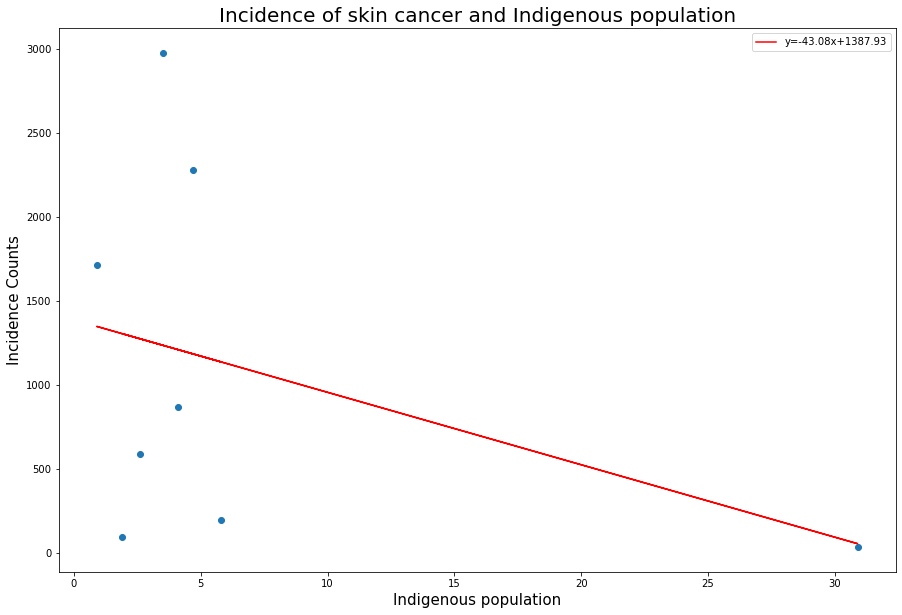

In [173]:
y_values = new_df2['Incidence_Counts']
x_values = new_df2['Indigenous population']
slope=-43.076
intercept=1387.93
line_reg = slope*(new_df2['Indigenous population'])+intercept
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.scatter(x_values,y_values)

plt.plot(new_df2['Indigenous population'], line_reg, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))

plt.title("Incidence of skin cancer and Indigenous population",fontsize=20)
plt.xlabel('Indigenous population',fontsize=15)
plt.ylabel('Incidence Counts',fontsize=15)
print(f"The equation of the regression line is: {line_eq}")
print(f"The values acroos the slope of the regression line is: {line_reg}")
plt.rcParams["figure.figsize"] = [15,10]
plt.legend()
plt.savefig('Regression Analysis')
plt.show()